In [1]:
import os
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define the root directories for training and testing data
train_dir = '/content/drive/MyDrive/INTEL_data_practice/DATA/seg_train/seg_train'
test_dir = '/content/drive/MyDrive/INTEL_data_practice/DATA/seg_test/seg_test'

# Define transformations (resize, convert to tensor, normalize)
transform = transforms.Compose([
    transforms.Resize((28, 28)),  # Resize images to 28x28
    transforms.ToTensor(),        # Convert images to PyTorch tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalize images (mean, std)
])

# Create datasets using ImageFolder
train_dataset = datasets.ImageFolder(root=train_dir, transform=transform)
test_dataset = datasets.ImageFolder(root=test_dir, transform=transform)

# Create DataLoaders
batch_size = 64
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Check if datasets are loaded correctly
print(f"Number of training samples: {len(train_dataset)}")
print(f"Number of testing samples: {len(test_dataset)}")
print(f"Class-to-index mapping: {train_dataset.class_to_idx}")

# Example of how to get a batch of data
data_iter = iter(train_dataloader)
images, labels = next(data_iter)


print(f"Batch of images has shape: {images.shape}")
print(f"Batch of labels: {labels}")


Number of training samples: 13323
Number of testing samples: 2990
Class-to-index mapping: {'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}
Batch of images has shape: torch.Size([64, 3, 28, 28])
Batch of labels: tensor([1, 1, 3, 0, 3, 2, 1, 3, 4, 1, 5, 5, 3, 3, 4, 0, 2, 5, 4, 2, 2, 2, 3, 0,
        1, 4, 5, 2, 0, 3, 2, 5, 5, 0, 5, 3, 1, 5, 4, 5, 3, 3, 1, 3, 1, 5, 5, 2,
        3, 0, 1, 4, 5, 1, 3, 3, 2, 1, 1, 2, 0, 2, 0, 0])


In [2]:
print(f"Batch of images has shape: {images.shape}")
print(f"Batch of labels has shape: {labels.shape}")
idx_to_class = {v: k for k, v in train_dataset.class_to_idx.items()}


Batch of images has shape: torch.Size([64, 3, 28, 28])
Batch of labels has shape: torch.Size([64])


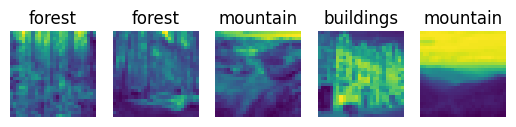

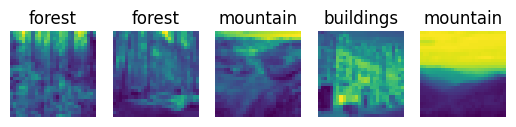

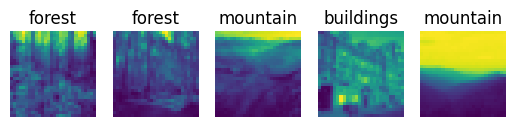

In [3]:
import matplotlib.pyplot as plt
import numpy as np

for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(images[i,0,:,:])
    plt.title(idx_to_class[labels[i].item()])
    plt.axis('off')
plt.show()

for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(images[i,1,:,:])
    plt.title(idx_to_class[labels[i].item()])
    plt.axis('off')
plt.show()

for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(images[i,2,:,:])
    plt.title(idx_to_class[labels[i].item()])
    plt.axis('off')
plt.show()


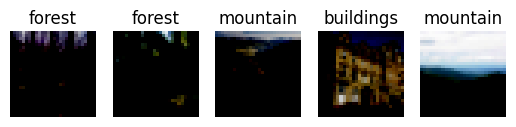

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Display the first 5 images with their labels using full RGB channels
for i in range(5):
    plt.subplot(1, 5, i+1)
    # Combine channels into RGB format
    img_rgb = images[i].permute(1, 2, 0).numpy()  # Convert to (height, width, channels)
    plt.imshow(img_rgb)
    plt.title(idx_to_class[labels[i].item()])
    plt.axis('off')
plt.show()


In [5]:
images, labels = next(data_iter)

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [7]:
class Net(nn.Module):

  def __init__(self):
    super().__init__()
    self.flatten = nn.Flatten()
    self.linear_relu_stack = nn.Sequential(
        nn.Linear(28*28, 512),
        nn.ReLU(),
        nn.Linear(512, 254),
        nn.ReLU(),
        nn.Linear(254, 150),
        nn.ReLU(),
        nn.Linear(150, 10),
    )

  def forward(self, x):
    x = self.flatten(x)
    logits = self.linear_relu_stack(x)
    output = F.log_softmax(logits, dim=1)
    return output


In [8]:
loaded_model = Net()
loaded_model.load_state_dict(torch.load('/content/drive/MyDrive/MNIST_practice/model_weights.pth'))
loaded_model.eval()

Net(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=254, bias=True)
    (3): ReLU()
    (4): Linear(in_features=254, out_features=150, bias=True)
    (5): ReLU()
    (6): Linear(in_features=150, out_features=10, bias=True)
  )
)

tensor([[ 0.7961,  0.7098,  0.6078,  0.8118,  0.8745,  0.5373,  0.0510,  0.0745,
          0.4588,  0.6314,  0.1451,  0.1608,  0.0824,  0.4118,  0.2078, -0.3255,
         -0.4667, -0.4980, -0.2627, -0.3804, -0.9059, -0.9529, -0.8431, -0.5765,
         -0.5608, -0.9294, -0.5451,  0.1765],
        [ 0.4745,  0.5373,  0.4588,  0.6157,  0.6941,  0.5686,  0.0980,  0.2157,
          0.4196,  0.6392,  0.8745,  0.8745,  0.7961,  0.4902, -0.0196, -0.5216,
         -0.7255, -0.6549, -0.5843, -0.8431, -0.9216, -0.7098,  0.1843,  0.5373,
          0.4588, -0.0118,  0.3490,  0.5373],
        [ 0.3490,  0.2941,  0.2000,  0.4588,  0.5373,  0.6000,  0.5373,  0.5373,
          0.7647,  0.8431,  0.9608,  0.9686,  0.8745,  0.7961,  0.7961,  0.2706,
         -0.3176, -0.5137, -0.7333, -0.8667, -0.8667, -0.6863, -0.2157, -0.0118,
          0.3176,  0.6706,  0.6784,  0.2471],
        [ 0.1451, -0.0039,  0.0431,  0.1373,  0.3098,  0.5294,  0.5529,  0.6941,
          0.8980,  0.9373,  0.8980,  0.9216,  0.6784

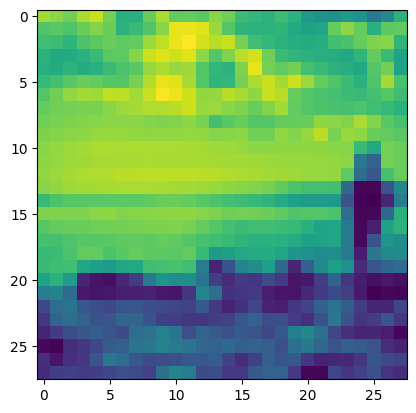

In [9]:
X = images[0,0,:,:]
print(X)
X = images[0, 0, :, :].view(1, 1, 28, 28).float()
print(X)
pred_probab = loaded_model(X)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred.item()}")
plt.imshow(images[0,1,:,:])
print(f"Actual class: {idx_to_class[labels[0].item()]}")

In [10]:
class Intel_Net(nn.Module):

  def __init__(self):
    super().__init__()
    self.flatten = nn.Flatten()
    self.linear_relu_stack = nn.Sequential(
        nn.Linear(3*784, 784),
        nn.ReLU(),
        nn.Linear(784, 512),
        nn.ReLU(),
        nn.Linear(512, 254),
        nn.ReLU(),
        nn.Linear(254, 150),
        nn.ReLU(),
        nn.Linear(150, 50),
        nn.ReLU(),
        nn.Linear(50, 20),
        nn.ReLU(),
        nn.Linear(20, 10),
        nn.ReLU(),
        nn.Linear(10, 6),
    )

  def forward(self, x):
    x = self.flatten(x)
    logits = self.linear_relu_stack(x)
    output = F.log_softmax(logits, dim=1)
    return output


In [11]:
new_model = Intel_Net()

In [12]:
count = 0
correct =0
for i in range(10):
  X = images[i, :, :, :].view(1, 3, 28, 28).float()
  pred_probab = new_model(X)
  y_pred = pred_probab.argmax(1)
  print(f"Predicted class: {y_pred.item()}")
  print(f"Actual class: {labels[i].item()}")
  if(y_pred.item() == labels[i].item()):
    correct += 1
  count += 1
print(f"Accuracy: {correct/count}")



Predicted class: 3
Actual class: 4
Predicted class: 3
Actual class: 2
Predicted class: 3
Actual class: 5
Predicted class: 3
Actual class: 4
Predicted class: 3
Actual class: 5
Predicted class: 3
Actual class: 5
Predicted class: 3
Actual class: 0
Predicted class: 3
Actual class: 5
Predicted class: 3
Actual class: 2
Predicted class: 3
Actual class: 2
Accuracy: 0.0


Predicted class: 3
Actual class: 4


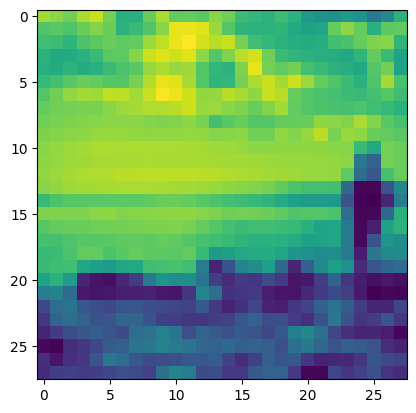

In [13]:
# X = images[0,0,:,:]
# print(X)
# X = images[0, 0, :, :].view(1, 1, 28, 28).float()
# print(X)
pred_probab = new_model(X)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred.item()}")
plt.imshow(images[0,1,:,:])
print(f"Actual class: {labels[0].item()}")

In [14]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        # print(X)
        # print(batch)
        # print(y)

        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

# Define the testing loop
def test_loop(dataloader, model, loss_fn):
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [15]:
learning_rate = 1e-3
batch_size = 64
epochs = 5
optimizer = torch.optim.SGD(new_model.parameters(), lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()
for epoch in range(epochs):
    print(f"Epoch {epoch+1}\n-------------------------------")
    train_loop(train_dataloader, new_model, loss_fn, optimizer)
    test_loop(test_dataloader, new_model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 1.808200  [    0/13323]
loss: 1.833708  [ 6400/13323]
loss: 1.812368  [12800/13323]
Test Error: 
 Accuracy: 17.6%, Avg loss: 1.801460 

Epoch 2
-------------------------------
loss: 1.800444  [    0/13323]
loss: 1.776843  [ 6400/13323]
loss: 1.792141  [12800/13323]
Test Error: 
 Accuracy: 17.6%, Avg loss: 1.799152 

Epoch 3
-------------------------------
loss: 1.833877  [    0/13323]
loss: 1.808038  [ 6400/13323]
loss: 1.821791  [12800/13323]
Test Error: 
 Accuracy: 17.6%, Avg loss: 1.797261 

Epoch 4
-------------------------------
loss: 1.787160  [    0/13323]
loss: 1.795211  [ 6400/13323]
loss: 1.815879  [12800/13323]
Test Error: 
 Accuracy: 17.6%, Avg loss: 1.795728 

Epoch 5
-------------------------------
loss: 1.806795  [    0/13323]
loss: 1.798334  [ 6400/13323]
loss: 1.772049  [12800/13323]
Test Error: 
 Accuracy: 17.6%, Avg loss: 1.794503 

Done!


In [16]:
test_loop(train_dataloader, new_model, loss_fn)

Test Error: 
 Accuracy: 15.2%, Avg loss: 1.799247 



In [17]:
torch.save(new_model.state_dict(), '/content/drive/MyDrive/INTEL_data_practice/without_convolution/model_weights.pth')